In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

C:\Users\katal\Documents\ProgramsPackages\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Reading data
df = pd.read_csv('winequality-red.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- All columns seem to have appropriate type

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000


## Preprocessing

In [5]:
# Missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Checking for duplicates
df.shape[0] - df.drop_duplicates().shape[0], df[df.duplicated(keep=False)]

(240,
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00            1.90      0.076   
 4               7.4             0.700         0.00            1.90      0.076   
 9               7.5             0.500         0.36            6.10      0.071   
 11              7.5             0.500         0.36            6.10      0.071   
 22              7.9             0.430         0.21            1.60      0.106   
 27              7.9             0.430         0.21            1.60      0.106   
 39              7.3             0.450         0.36            5.90      0.074   
 40              7.3             0.450         0.36            5.90      0.074   
 64              7.2             0.725         0.05            4.65      0.086   
 65              7.2             0.725         0.05            4.65      0.086   
 75              8.8             0.410         0.64            2.20      0.093   
 76       

- 240 duplicates

In [7]:
# Dropping duplicates 
df.drop_duplicates(inplace=True)
df.reset_index().drop('index', axis=1, inplace=True)

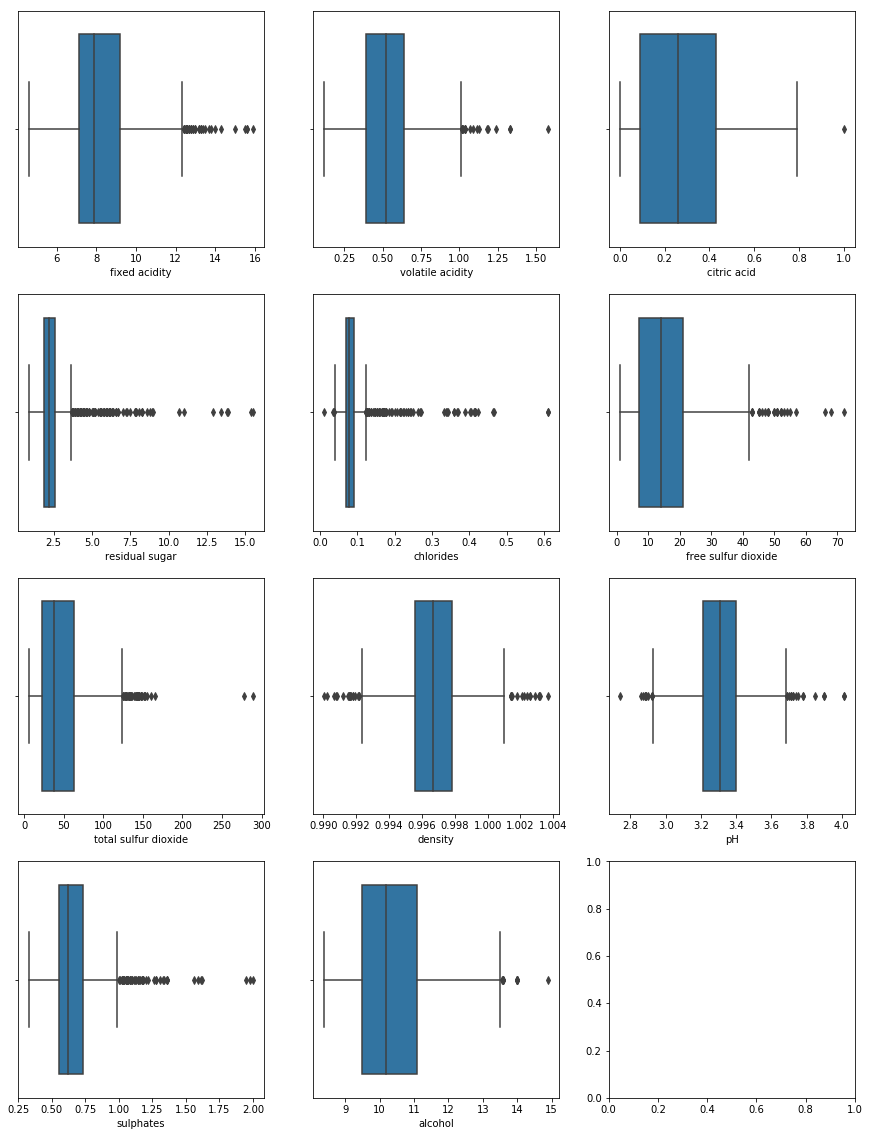

In [8]:
# Cheking for outliers
fig, axes = plt.subplots(4,3, figsize=(15,20))
axes = axes.flatten()
ax_idx = 0
for i in df.columns[:-1]:
    sns.boxplot(df[i], ax=axes[ax_idx])
    ax_idx += 1

In [9]:
df_out_removed = df.copy()
for i in df.columns[:-1]:
    bf = df_out_removed.shape[0]
    df_out_removed = df_out_removed[(df_out_removed[i] < df_out_removed[i].quantile(0.95)) & (df_out_removed[i] > df_out_removed[i].quantile(0.05))]
    print(f'Entries dropped for "{i}" : {bf - df_out_removed.shape[0]}')

Entries dropped for "fixed acidity" : 146
Entries dropped for "volatile acidity" : 128
Entries dropped for "citric acid" : 146
Entries dropped for "residual sugar" : 126
Entries dropped for "chlorides" : 85
Entries dropped for "free sulfur dioxide" : 114
Entries dropped for "total sulfur dioxide" : 67
Entries dropped for "density" : 57
Entries dropped for "pH" : 58
Entries dropped for "sulphates" : 50
Entries dropped for "alcohol" : 53


In [10]:
df.shape, df_out_removed.shape

((1359, 12), (329, 12))

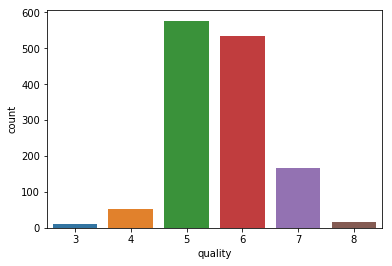

In [11]:
sns.countplot(df['quality'])

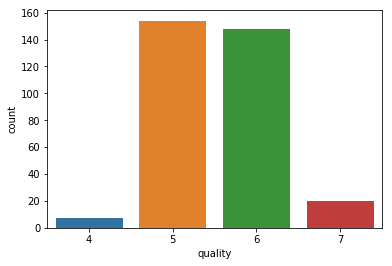

In [12]:
sns.countplot(df_out_removed['quality'])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
ss = StandardScaler()
x, y = df[df.columns[:-1]], df['quality']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [15]:
train_x.shape, test_x.shape

((951, 11), (408, 11))

## KNN

In [16]:
from scipy import stats
from sklearn.metrics import accuracy_score

In [17]:
def KNN_algo(x1, x2, k, d_type):
    if(d_type == 'E'):
        dists = np.sqrt(np.sum((x1-x2)**2,axis=1)) # Euclidian
    elif(d_type == 'M'):
        dists = np.sqrt(np.sum(np.abs(x1-x2),axis=1)) # Manhattan
    return stats.mode(train_y.iloc[dists.argsort()][:k])[0][0]

In [18]:
def KNN(train_x, test_x, train_y, k = 10, d_type='E'):
    y_preds = []
    for i in test_x:
        y_preds.append(KNN_algo(train_x, i, k, d_type))#
    return y_preds

In [19]:
# Euclidian
for k in range(1,21):
    preds = np.array(KNN(train_x, test_x, train_y, k))
    print(f'k: {k} | accuracy: {accuracy_score(test_y, preds)}')

k: 1 | accuracy: 0.5367647058823529
k: 2 | accuracy: 0.5024509803921569
k: 3 | accuracy: 0.4852941176470588
k: 4 | accuracy: 0.5171568627450981
k: 5 | accuracy: 0.5269607843137255
k: 6 | accuracy: 0.5269607843137255
k: 7 | accuracy: 0.5392156862745098
k: 8 | accuracy: 0.5686274509803921
k: 9 | accuracy: 0.5514705882352942
k: 10 | accuracy: 0.5441176470588235
k: 11 | accuracy: 0.553921568627451
k: 12 | accuracy: 0.5637254901960784
k: 13 | accuracy: 0.5784313725490197
k: 14 | accuracy: 0.5588235294117647
k: 15 | accuracy: 0.5735294117647058
k: 16 | accuracy: 0.5661764705882353
k: 17 | accuracy: 0.5686274509803921
k: 18 | accuracy: 0.5686274509803921
k: 19 | accuracy: 0.553921568627451
k: 20 | accuracy: 0.5563725490196079


In [20]:
# Manhattan
for k in range(1,21):
    preds = np.array(KNN(train_x, test_x, train_y, k, 'M'))
    print(f'k: {k} | accuracy: {accuracy_score(test_y, preds)}')

k: 1 | accuracy: 0.5416666666666666
k: 2 | accuracy: 0.5073529411764706
k: 3 | accuracy: 0.4852941176470588
k: 4 | accuracy: 0.5343137254901961
k: 5 | accuracy: 0.5196078431372549
k: 6 | accuracy: 0.5049019607843137
k: 7 | accuracy: 0.5147058823529411
k: 8 | accuracy: 0.5269607843137255
k: 9 | accuracy: 0.5318627450980392
k: 10 | accuracy: 0.5514705882352942
k: 11 | accuracy: 0.6004901960784313
k: 12 | accuracy: 0.5735294117647058
k: 13 | accuracy: 0.5955882352941176
k: 14 | accuracy: 0.5857843137254902
k: 15 | accuracy: 0.5906862745098039
k: 16 | accuracy: 0.5661764705882353
k: 17 | accuracy: 0.5882352941176471
k: 18 | accuracy: 0.5637254901960784
k: 19 | accuracy: 0.5808823529411765
k: 20 | accuracy: 0.5612745098039216


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_y)
    print(f'k: {k} | accuracy:{accuracy_score(test_y, knn.predict(test_x))}')

k: 1 | accuracy:0.5367647058823529
k: 2 | accuracy:0.5024509803921569
k: 3 | accuracy:0.4852941176470588
k: 4 | accuracy:0.5171568627450981
k: 5 | accuracy:0.5269607843137255
k: 6 | accuracy:0.5269607843137255
k: 7 | accuracy:0.5392156862745098
k: 8 | accuracy:0.5686274509803921
k: 9 | accuracy:0.5514705882352942
k: 10 | accuracy:0.5441176470588235
k: 11 | accuracy:0.553921568627451
k: 12 | accuracy:0.5637254901960784
k: 13 | accuracy:0.5784313725490197
k: 14 | accuracy:0.5588235294117647
k: 15 | accuracy:0.5735294117647058
k: 16 | accuracy:0.5661764705882353
k: 17 | accuracy:0.5686274509803921
k: 18 | accuracy:0.5686274509803921
k: 19 | accuracy:0.553921568627451
k: 20 | accuracy:0.5563725490196079


In [78]:
train_x[:, 0]

array([ 0.51998416, -0.62510079,  0.11920443,  1.26428937,  0.6917469 ,
        0.29096717,  0.92076389, -0.2815753 ,  1.72232335, -0.96862627,
       -0.68235504,  0.34822142,  0.40547566, -1.25489751, -0.16706681,
       -0.2815753 ,  2.40937432, -0.10981256,  0.17645867,  0.51998416,
        0.40547566,  0.46272991, -0.45333805, -0.45333805, -0.56784654,
        1.89408609, -0.68235504,  0.51998416, -0.73960928, -1.02588052,
       -0.85411778,  0.23371292,  1.09252663, -0.73960928, -0.91137202,
        0.46272991,  0.11920443, -0.73960928, -0.2815753 , -1.54116874,
       -0.45333805, -0.2815753 , -0.3960838 ,  0.00469593,  1.09252663,
       -0.96862627,  0.40547566,  0.34822142,  2.23761158, -0.05255832,
        2.52388281, -0.51059229, -0.91137202,  0.06195018,  2.12310308,
        0.34822142, -1.65567724, -0.91137202,  1.55056061,  1.26428937,
       -0.85411778, -1.19764326, -0.68235504, -0.96862627,  0.46272991,
       -0.16706681,  0.51998416, -0.56784654,  1.20703513, -0.62

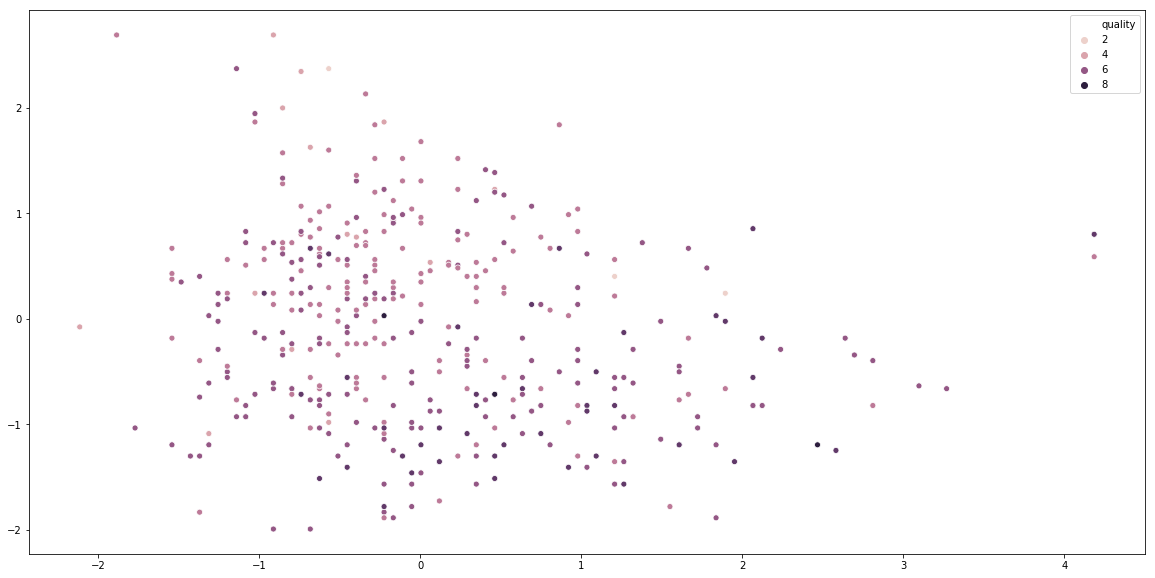

In [80]:
sns.scatterplot(test_x[:, 0],test_x[:, 1],hue=test_y[:])

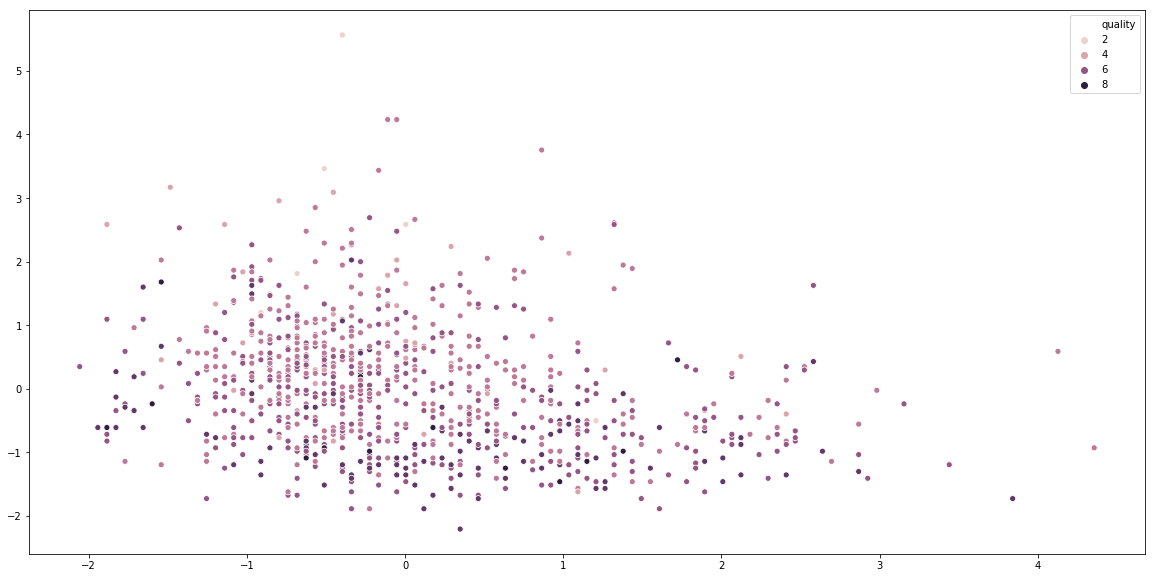

In [79]:
sns.scatterplot(train_x[:, 0],train_x[:, 1],hue=train_y[:])

In [23]:
train_x['quality'].value_counts()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [50]:
plt.rcParams['figure.figsize'] = (20,10)

<module 'matplotlib.pyplot' from 'C:\\Users\\katal\\Documents\\ProgramsPackages\\lib\\site-packages\\matplotlib\\pyplot.py'>

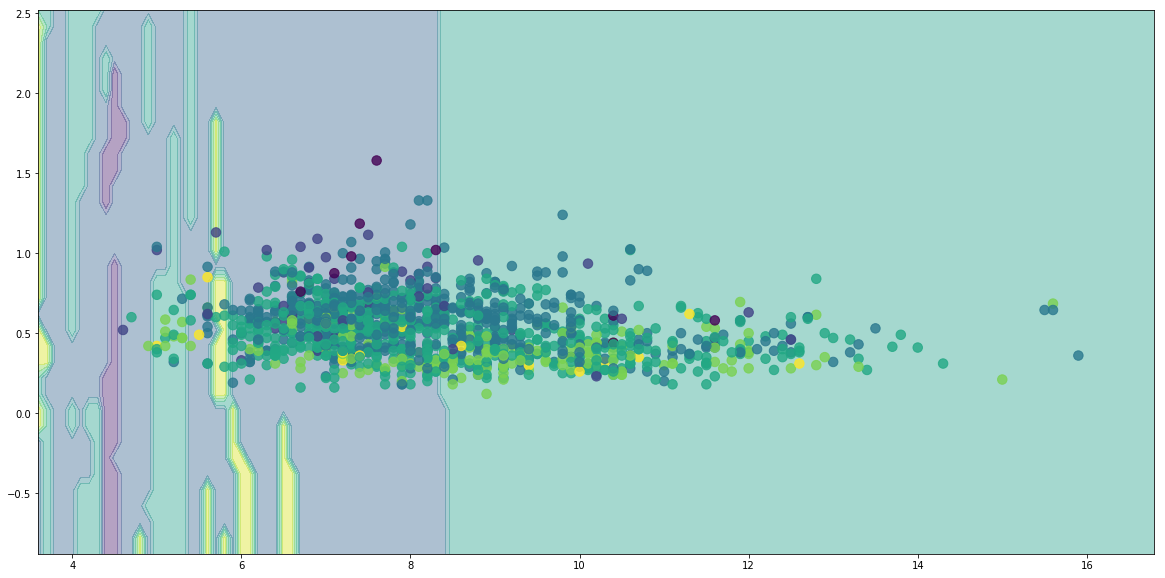

In [93]:
plot_decision_boundaries(np.array(x),np.array(y),KNeighborsClassifier,n_neighbors=10)

In [67]:
train_x

array([[ 0.51998416, -0.39703663, -0.2000691 , ..., -1.070019  ,
        -0.88252719, -0.9712491 ],
       [-0.62510079,  0.53467263, -1.02596477, ...,  1.26018712,
        -0.70085101, -0.69543885],
       [ 0.11920443, -0.23731504, -0.81949085, ..., -0.9405631 ,
        -0.76140974, -0.9712491 ],
       ...,
       [ 0.11920443, -0.7164798 ,  0.67744505, ..., -0.22855568,
        -0.57973357,  1.41910644],
       [-0.91137202,  0.88073607, -0.97434629, ...,  0.74236354,
        -0.82196846,  1.97072695],
       [ 2.12310308, -1.35536615,  1.14201136, ..., -2.17039411,
         0.02585367, -0.51156535]])

In [92]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, 3:5]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, s=90)
    return plt

# Should learn how to plot decision boudaries

# Next:
- Knn regressor
- SVMs
- Naive Bayes
- Unsupervised
- Maybe some sort of a tools like Power Bi